In [73]:
import numpy as np
import os
import math
#import cv2
from pylab import plt
import scipy.stats as sts

In [14]:
a = os.listdir(".")
def csv_gen(path):
    return ( i for i in np.genfromtxt(path, delimiter=','))

def fname_iter(directory):
    return (d for d in os.listdir(directory))
def img_iter(directory):
    im_exts = ['png','jpg','jpeg' ]
    for path in fname_iter(directory):
        if path.split('.')[-1] in im_exts:
            im = cv2.imread(path,mode='RGB')
            yield im

data_path = [
    './data/ML_interfere_eval/seq/data_20-03-2019_18-59_portD1.csv'
    ,'./data/ML_interfere_eval/seq/data_20-03-2019_18-59_portD2.csv'
]

In [15]:
def read_csv_data(filepath):
    d = np.genfromtxt(filepath,delimiter=',')
    return d

data = [
    read_csv_data(p) for p in data_path
]

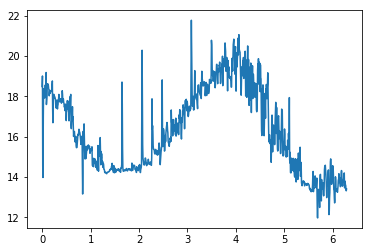

In [62]:
plt.plot(X_1, Y_1)

In [56]:
X_1 = np.array([data[0][i][1] for i in range(len(data[0]))])[600:]
X_2 = np.array([data[1][i][1] for i in range(len(data[1]))])[600:]

In [55]:
Y_1 = np.array([data[0][i][0] for i in range(len(data[0]))])[600:]
Y_2 = np.array([data[1][i][0] for i in range(len(data[1]))])[600:]

In [63]:
X_1 = (X_1 - X_1[0])/(X_1[len(X_1)-1]-X_1[0])*2*3.1415
X_2 = (X_2 - X_2[0])/(X_2[len(X_2)-1]-X_2[0])*2*3.1415

In [38]:
def get_koef(phi, h, X, Y):
    sigma = 0
    mu = 0
    n = 0
    mu = Y[abs(X-phi)<h].mean()
    sigma = Y[abs(X-phi)<h].std()
    return mu, sigma

In [39]:
def learning_proces(X_1, Y_1, X_2, Y_2, h):
    phis = np.linspace(0, 2*3.1415, math.floor(3.1415/h))
    mu_1 = np.zeros(len(phis))
    sigma_1 = np.zeros(len(phis))
    mu_2 = np.zeros(len(phis))
    sigma_2 = np.zeros(len(phis))
    for i in range(len(phis)):
        mu_1[i] , sigma_1[i] = get_koef(phis[i], h, X_1, Y_1)
        mu_2[i], sigma_2[i] = get_koef(phis[i], h, X_2, Y_2)
    return phis, mu_1, mu_2, sigma_1, sigma_2

In [40]:
def count_metrics(mu_1, sigma_1,mu_2, sigma_2, Y):
    r = 0
    for y in Y:
        r -= float((y[0]-mu_1)**2/2/sigma_1**2)
        r -= float((y[1]-mu_2)**2/2/sigma_2**2)
    return float(r)

In [41]:
def make_prediction(Y, phis, mu_1, mu_2, sigma_1, sigma_2):
    ans = 0
    prob = count_metrics(mu_1[0], sigma_1[0],mu_2[0], sigma_2[0], Y)
    for i in range( len(mu_1)):
        a = count_metrics(mu_1[i], sigma_1[i],mu_2[i], sigma_2[i], Y)
        if a > prob:
            ans = phis[i]
            prob = a
    probability = np.zeros(len(phis))
    for i in range(len(phis)):
        probability[i] = count_metrics(mu_1[i], sigma_1[i],mu_2[i], sigma_2[i], Y)
    return ans, prob/len(Y), probability

In [66]:
%%time
phis, mu_1, mu_2, sigma_1, sigma_2 = learning_proces(np.array(X_1), np.array(Y_1), np.array(X_2), np.array(Y_2), 0.2)

CPU times: user 5.13 ms, sys: 1.7 ms, total: 6.83 ms
Wall time: 5.62 ms


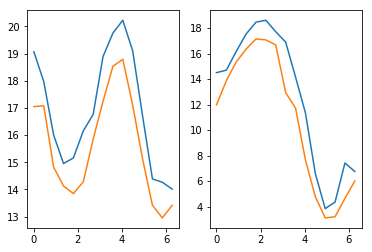

In [72]:

plt.subplot(1,2,1)
plt.plot(phis, np.array(mu_1)+np.array(sigma_1))
plt.plot(phis, np.array(mu_1)-np.array(sigma_1))

plt.subplot(1,2,2)

plt.plot(phis, np.array(mu_2)+np.array(sigma_2))
plt.plot(phis, np.array(mu_2)-np.array(sigma_2))

In [69]:
def make_test(n, x, model, sigma, model_1):
    return [[float(sts.norm(model(x), sigma).rvs(1)),float(sts.norm(model_1(x), sigma).rvs(1))]  for i in range(10)]






phi_test = np.linspace(0, 2*3.1415, 100)
answers = np.zeros(len(phi_test))
for i in range(len(phi_test)):
    answers[i], proba, probability = make_prediction(, phis, mu_1, mu_2, sigma_1, sigma_2)
plt.plot(phi_test, answers)  

NameError: name 'model' is not defined

In [76]:
sts.norm(13,1).rvs((10))

array([13.51382609, 12.00350288, 14.8660095 , 12.26940343, 11.45722533,
       12.77457208, 14.85915627, 11.15029482, 13.55656797, 12.47875846])

In [80]:
Y = np.zeros((10,2))

In [105]:
for i in range(10):
    Y[i][0] = sts.norm(19.5,1).rvs(1)
    Y[i][1] = sts.norm(8,1).rvs(1)

In [106]:
Y

array([[20.13517051,  7.86834182],
       [19.74946103,  8.1861017 ],
       [18.73063207,  7.73955396],
       [16.94110943,  8.19055571],
       [18.9864611 ,  6.62730914],
       [19.32361155,  8.91278722],
       [20.20451144,  9.33576584],
       [16.53731247,  9.68324472],
       [19.00116125,  7.31721787],
       [21.30964028,  7.73407683]])

In [107]:
ans, proba, probability = make_prediction(Y, phis, mu_1, mu_2, sigma_1, sigma_2)

In [108]:
ans

4.039071428571429

In [109]:
proba

-2.390280003938701

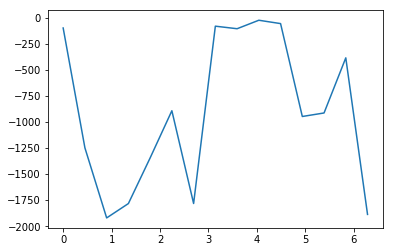

In [110]:
plt.plot(phis, probability)

In [111]:
sigma_1.mean()

0.6591411520662281

In [114]:
import gauss_est

In [115]:
X = [np.array(X_1), np.array(X_2)]
Y = [np.array(Y_1), np.array(Y_2)]

In [117]:
estimator = gauss_est

In [120]:
estimator(0.6).fit(X, Y)

TypeError: 'module' object is not callable